In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust the configuration of the plots i will create shortly


#read in data
df = pd.read_csv(r"C:\Users\vudir\Downloads\movies.csv")

In [8]:
# take a look at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 28%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 2%
name - 0%
rating - 1%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [4]:
# Data Types for our columns

print(df.dtypes)

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object


In [5]:
#changing data type of desired columns

df['budget'] = df['budget'].fillna(0).astype(np.int64)

df['gross'] = df['gross'].fillna(0).astype(np.int64)

In [21]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000,NaN,United States,Joseph Ebanks,Drama,0,More to Life,NaN,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020
7664,0,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,0,Dream Round,NaN,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020
7665,58750,Embi Productions,United States,Nkanya Nkwai,Drama,0,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",NaN,5.7,Onyama Laura,29.0,Lynno Lovert,2020
7666,15000,NaN,United States,James Randall,Drama,0,It's Just Us,NaN,"October 1, 2020 (United States)",120.0,NaN,Christina Roz,NaN,James Randall,2020


In [6]:
#create correct year column due to inconsistencies

df['correctyear'] = df['released'].astype(str).str[:4]

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correctyear
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,June
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,July
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,June
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,July
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000,NaN,United States,Joseph Ebanks,Drama,0,More to Life,NaN,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020,Octo
7664,0,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,0,Dream Round,NaN,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020,Febr
7665,58750,Embi Productions,United States,Nkanya Nkwai,Drama,0,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",NaN,5.7,Onyama Laura,29.0,Lynno Lovert,2020,Apri
7666,15000,NaN,United States,James Randall,Drama,0,It's Just Us,NaN,"October 1, 2020 (United States)",120.0,NaN,Christina Roz,NaN,James Randall,2020,Octo


In [7]:
del df['correctyear']

<AxesSubplot:>

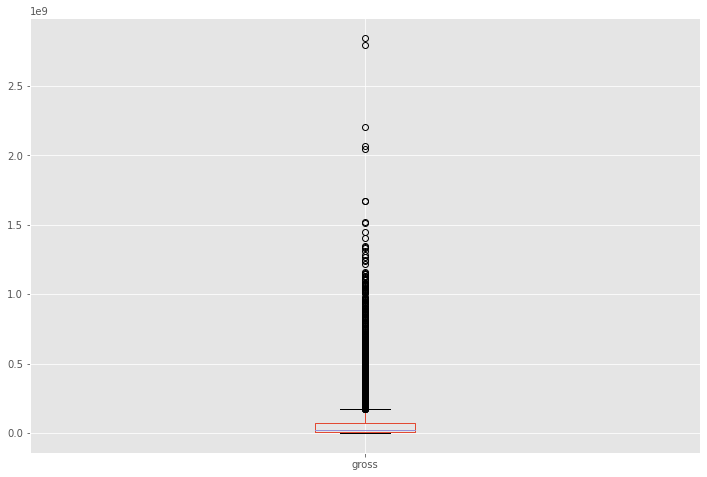

In [8]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [ ]:
df.drop_duplicates()

In [14]:
# Order our Data a little bit to see

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [10]:
#pd.set_option('display.max_rows', 10)

In [11]:
#Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

In [12]:
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980
5,550000,Paramount Pictures,United States,Sean S. Cunningham,Horror,39754601,Friday the 13th,R,"May 9, 1980 (United States)",95.0,6.4,Betsy Palmer,123000.0,Victor Miller,1980
6,27000000,Universal Pictures,United States,John Landis,Action,115229890,The Blues Brothers,R,"June 20, 1980 (United States)",133.0,7.9,John Belushi,188000.0,Dan Aykroyd,1980
7,18000000,Chartoff-Winkler Productions,United States,Martin Scorsese,Biography,23402427,Raging Bull,R,"December 19, 1980 (United States)",129.0,8.2,Robert De Niro,330000.0,Jake LaMotta,1980
8,54000000,Dovemead Films,United States,Richard Lester,Action,108185706,Superman II,PG,"June 19, 1981 (United States)",127.0,6.8,Gene Hackman,101000.0,Jerry Siegel,1980
9,10000000,United Artists,United States,Walter Hill,Biography,15795189,The Long Riders,R,"May 16, 1980 (United States)",100.0,7.0,David Carradine,10000.0,Bill Bryden,1980


In [ ]:
#Correlation Hypothesis

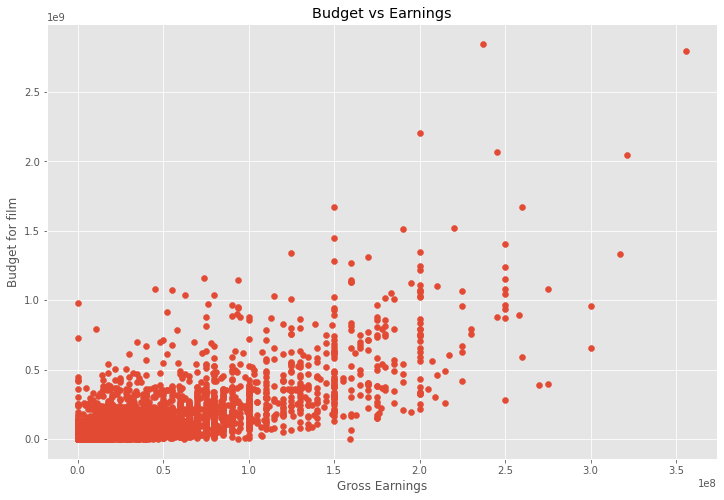

In [16]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for film')
plt.show()

In [15]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

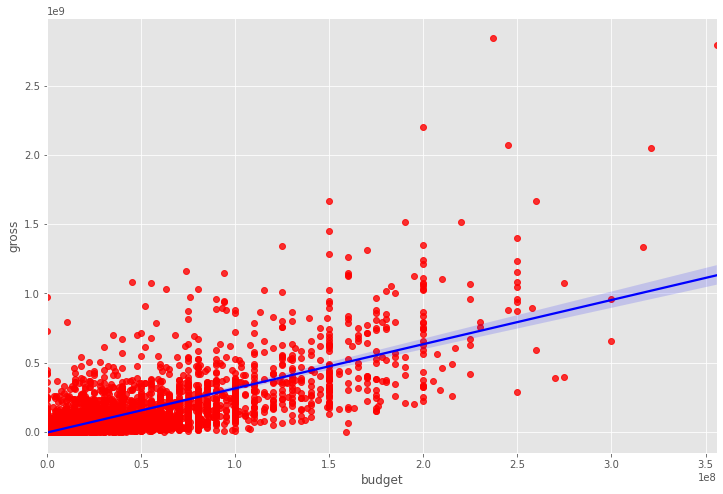

In [25]:
#plot regplot
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

<AxesSubplot:xlabel='gross', ylabel='budget'>

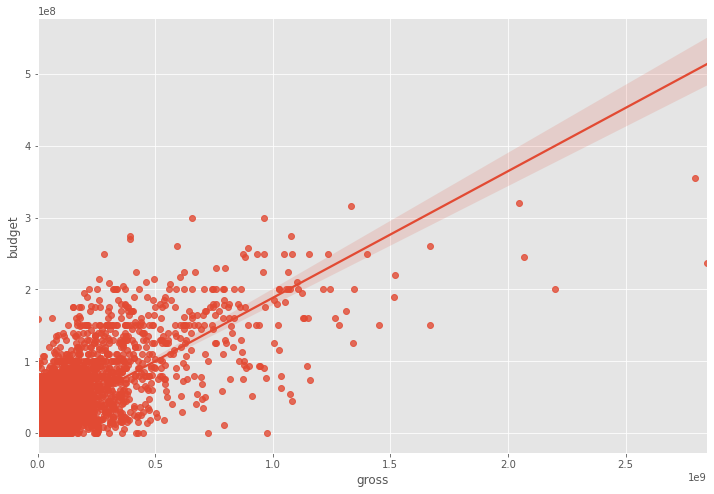

In [17]:
#plot budget vs gross using seaborn

sns.regplot(x="gross", y="budget", data=df)

In [ ]:
sns.regplot(x="score", y="gross", data=df)

In [26]:
df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.750157,0.269510,0.055665,0.486862,0.309212
gross,0.750157,1.000000,0.245235,0.186392,0.632834,0.261900
runtime,0.269510,0.245235,1.000000,0.399451,0.309212,0.120811
score,0.055665,0.186392,0.399451,1.000000,0.409182,0.097995
votes,0.486862,0.632834,0.309212,0.409182,1.000000,0.222945
year,0.309212,0.261900,0.120811,0.097995,0.222945,1.000000


In [27]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')#Pearson #Kendall #Spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.750157,0.269510,0.055665,0.486862,0.309212
gross,0.750157,1.000000,0.245235,0.186392,0.632834,0.261900
runtime,0.269510,0.245235,1.000000,0.399451,0.309212,0.120811
score,0.055665,0.186392,0.399451,1.000000,0.409182,0.097995
votes,0.486862,0.632834,0.309212,0.409182,1.000000,0.222945
year,0.309212,0.261900,0.120811,0.097995,0.222945,1.000000


In [28]:
df.corr(method ='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.541956,0.176016,-0.005194,0.439902,0.209304
gross,0.541956,1.000000,0.176912,0.090626,0.560118,0.216595
runtime,0.176016,0.176912,1.000000,0.283611,0.198240,0.097184
score,-0.005194,0.090626,0.283611,1.000000,0.300115,0.067652
votes,0.439902,0.560118,0.198240,0.300115,1.000000,0.331465
year,0.209304,0.216595,0.097184,0.067652,0.331465,1.000000


In [29]:
df.corr(method ='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.716816,0.246748,-0.007500,0.604627,0.291152
gross,0.716816,1.000000,0.256783,0.132569,0.752265,0.314681
runtime,0.246748,0.256783,1.000000,0.399857,0.290159,0.142977
score,-0.007500,0.132569,0.399857,1.000000,0.428138,0.099045
votes,0.604627,0.752265,0.290159,0.428138,1.000000,0.469829
year,0.291152,0.314681,0.142977,0.099045,0.469829,1.000000


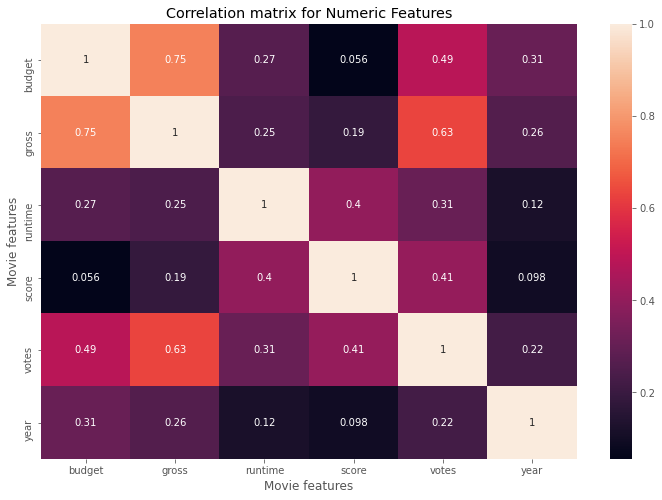

In [30]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [42]:
""""df.numerized = df

for col_name in df.numerized.columns:
    if df_numerized[col_name].dtype == object:
        df_numerized[col_name] = df_numerized[col_name].astype(category)
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized
""""

SyntaxError: EOL while scanning string literal (<ipython-input-42-daadc3ec49ac>, line 9)

In [45]:
numerized = df

for c in numerized.columns:
    if numerized[c].dtype == object:
        numerized[c] = numerized[c].astype('category')
        numerized[c] = numerized[c].cat.codes
        
numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5445,237000000,2253,55,1155,0,2847246203,533,5,696,162.0,7.8,2334,1100000.0,1778,2009
7445,356000000,1606,55,162,0,2797501328,535,5,183,181.0,8.4,2241,903000.0,743,2019
3045,200000000,2253,55,1155,6,2201647264,6896,5,704,194.0,7.8,1595,1100000.0,1778,1997
6663,245000000,1540,55,1125,0,2069521700,5144,5,698,138.0,7.8,524,876000.0,2550,2015
7244,321000000,1606,55,162,0,2048359754,536,5,192,149.0,8.4,2241,897000.0,743,2018


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5445,237000000,2253,55,1155,0,2847246203,533,5,696,162.0,7.8,2334,1100000.0,1778,2009
7445,356000000,1606,55,162,0,2797501328,535,5,183,181.0,8.4,2241,903000.0,743,2019
3045,200000000,2253,55,1155,6,2201647264,6896,5,704,194.0,7.8,1595,1100000.0,1778,1997
6663,245000000,1540,55,1125,0,2069521700,5144,5,698,138.0,7.8,524,876000.0,2550,2015
7244,321000000,1606,55,162,0,2048359754,536,5,192,149.0,8.4,2241,897000.0,743,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,0,1159,55,117,5,0,3712,6,1277,92.0,4.5,2797,274.0,82,1989
1614,0,146,54,1033,10,0,1745,6,55,85.0,5.2,166,1300.0,1743,1989
1606,0,2237,6,2743,8,0,2691,6,257,89.0,6.0,1195,2900.0,946,1989
1601,0,504,18,1105,4,0,3836,-1,1160,104.0,7.1,681,1500.0,1696,1989


In [ ]:
# Using factorize - this assigns a random numeric value for each unique categorical value

numerized.apply(lambda x: x.factorize()[0]).corr(method='pearson')

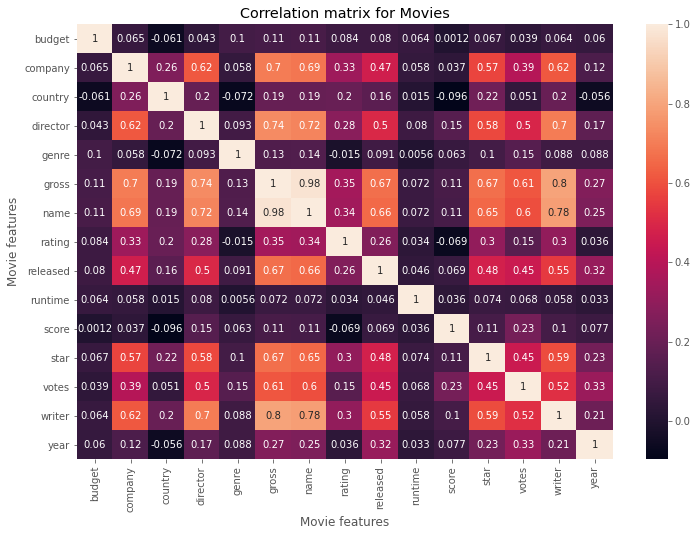

In [47]:
correlation_matrix = numerized.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [48]:
numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,0.186474,0.131720,0.004976,-0.334021,0.750157,0.020548,-0.081939,0.009145,0.269510,0.055665,-0.019952,0.486862,-0.025911,0.309212
company,0.186474,1.000000,0.095548,0.004404,-0.071067,0.156745,0.009211,-0.032943,-0.010474,0.034402,0.001030,0.012442,0.133204,0.005646,-0.010431
country,0.131720,0.095548,1.000000,0.017490,-0.037615,0.095325,-0.010737,0.081244,-0.020427,-0.078412,-0.133348,-0.012998,0.073625,0.015343,-0.070938
director,0.004976,0.004404,0.017490,1.000000,-0.015258,-0.014916,0.009079,0.019483,-0.001478,0.017624,0.009559,0.039234,0.000260,0.299067,-0.020795
genre,-0.334021,-0.071067,-0.037615,-0.015258,1.000000,-0.234297,0.016355,0.072423,0.029822,-0.052711,0.027965,-0.005477,-0.145307,0.006567,-0.081261
gross,0.750157,0.156745,0.095325,-0.014916,-0.234297,1.000000,0.006989,-0.095450,0.000519,0.245235,0.186392,-0.001129,0.632834,-0.022997,0.261900
name,0.020548,0.009211,-0.010737,0.009079,0.016355,0.006989,1.000000,-0.008069,-0.011311,0.010392,0.017097,0.006472,0.013088,0.009081,0.011453
rating,-0.081939,-0.032943,0.081244,0.019483,0.072423,-0.095450,-0.008069,1.000000,0.016613,0.062145,-0.001314,0.013405,0.033225,-0.005921,0.008779
released,0.009145,-0.010474,-0.020427,-0.001478,0.029822,0.000519,-0.011311,0.016613,1.000000,0.000868,0.042788,0.015777,0.016097,-0.002404,-0.000695
runtime,0.269510,0.034402,-0.078412,0.017624,-0.052711,0.245235,0.010392,0.062145,0.000868,1.000000,0.399451,0.010174,0.309212,-0.003511,0.120811


In [49]:
correlation_mat = numerized.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

budget  budget      1.000000
        company     0.065114
        country    -0.060810
        director    0.043335
        genre       0.101274
                      ...   
year    score       0.076737
        star        0.228048
        votes       0.326475
        writer      0.212396
        year        1.000000
Length: 225, dtype: float64


In [50]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country   score      -0.095521
score     country    -0.095521
country   genre      -0.072434
genre     country    -0.072434
rating    score      -0.069097
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 225, dtype: float64


In [51]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director  released    0.502084
released  director    0.502084
writer    votes       0.521323
votes     writer      0.521323
writer    released    0.546858
released  writer      0.546858
company   star        0.573670
star      company     0.573670
          director    0.581049
director  star        0.581049
writer    star        0.590607
star      writer      0.590607
votes     name        0.595709
name      votes       0.595709
gross     votes       0.611780
votes     gross       0.611780
director  company     0.616906
company   director    0.616906
writer    company     0.618775
company   writer      0.618775
name      star        0.653260
star      name        0.653260
released  name        0.656262
name      released    0.656262
released  gross       0.669825
gross     released    0.669825
star      gross       0.669963
gross     star        0.669963
company   name        0.686234
name      company     0.686234
director  writer      0.696227
writer    director    0.696227
gross   

In [52]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = numerized.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
2319    56491421806
2281    52514188890
731     43008941346
1812    40493607415
2253    40257053857
2316    36327887792
1713    19883797684
1606    15065592411
887     11873612858
2232    11795832638
889     11635441081
1637     9230230105
2147     8373718838
1856     7886344526
1109     7443502667
Name: gross, dtype: int64

In [ ]:
df['Year'] = df['released'].astype(str).str[:4]
df

In [ ]:
df.groupby(['company', 'year'])[["gross"]].sum()

In [ ]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

In [ ]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

In [ ]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [ ]:
df

In [ ]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

In [ ]:
df_numerized.corr(method='pearson')

In [ ]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [ ]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df

In [ ]:
sns.swarmplot(x="rating", y="gross", data=df)

In [ ]:
sns.stripplot(x="rating", y="gross", data=df)